In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
age_data = pd.read_csv('/Users/blakemyers/Desktop/age_gender.csv')
age_data.head(3)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [3]:
def label_age (row):
    if row['age'] >= 0 and row['age'] < 3:
        return 0
    elif row['age'] > 2 and row['age'] < 10:
        return 1
    elif row['age'] > 9 and row['age'] < 21:
        return 2
    elif row['age'] > 20 and row['age'] < 26:
        return 3
    elif row['age'] > 25 and row['age'] < 28:
        return 4
    elif row['age'] > 27 and row['age'] < 32:
        return 5
    elif row['age'] > 31 and row['age'] < 37:
        return 6
    elif row['age'] > 36 and row['age'] < 46:
        return 7
    elif row['age'] > 45 and row['age'] < 55:
        return 8
    elif row['age'] > 54 and row['age'] < 66:
        return 9
    else:
        return 10

In [4]:
age_data['AgeGroup'] = age_data.apply (lambda row: label_age(row), axis=1)

In [5]:
age_data.head(3)

,age,ethnicity,gender,img_name,pixels,AgeGroup
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,0
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,0
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,0


In [6]:
n = len(pd.unique(age_data['age']))

In [7]:
n

104

In [8]:
age_data["age"].max()

116

In [9]:
X = []
y = []
for index, row in age_data.iterrows():
    k = row['pixels'].split(" ")
    X.append(np.array(k))
    y.append(row['AgeGroup'])
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train= np_utils.to_categorical(y_train, num_classes=11)
y_test = np_utils.to_categorical(y_test, num_classes=11)

In [11]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

In [12]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,batch_size=32,epochs=30,verbose=1,validation_data=(X_test, y_test))

Train on 18964 samples, validate on 4741 samples
Epoch 1/30
18964/18964 [==============================] - 1282s 68ms/step - loss: 2.3689 - accuracy: 0.1138 - val_loss: 2.3523 - val_accuracy: 0.1015
Epoch 2/30
18964/18964 [==============================] - 1272s 67ms/step - loss: 2.2602 - accuracy: 0.1595 - val_loss: 2.0980 - val_accuracy: 0.2135
Epoch 3/30
18964/18964 [==============================] - 1272s 67ms/step - loss: 2.0000 - accuracy: 0.2392 - val_loss: 1.9550 - val_accuracy: 0.2438
Epoch 4/30
18964/18964 [==============================] - 1268s 67ms/step - loss: 1.8310 - accuracy: 0.2916 - val_loss: 1.7626 - val_accuracy: 0.3229
Epoch 5/30
18964/18964 [==============================] - 1270s 67ms/step - loss: 1.7329 - accuracy: 0.3219 - val_loss: 1.7092 - val_accuracy: 0.3145
Epoch 6/30
18964/18964 [==============================] - 1271s 67ms/step - loss: 1.6557 - accuracy: 0.3426 - val_loss: 1.6300 - val_accuracy: 0.3541
Epoch 7/30
18964/18964 [===========================

In [14]:
local_path = '/Users/blakemyers/Desktop/Jupyter/DeepLearning2021/TrainedModelSp21v2'
model.save(local_path)

In [15]:
y_pred=model.predict_classes(X_test)

In [16]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)

In [17]:
cm

array([[283,  47,   0,   0,   3,   0,   1,   1,   0,   0,   2],
       [ 35, 154,  59,   5,   6,   2,   1,   0,   0,   1,   0],
       [  1,  39, 169,  93,  18,  36,   8,   9,   1,   3,   1],
       [  0,   3,  61, 192,  91, 166,  45,  11,   2,   4,   0],
       [  0,   2,  25, 126, 136, 191,  71,  26,   5,   5,   2],
       [  0,   0,  25,  66,  83, 150,  78,  61,   8,   7,   2],
       [  0,   2,  18,  41,  45, 149, 119, 105,  20,  17,   1],
       [  1,   0,   6,  17,  23,  84, 107, 141,  73,  32,   3],
       [  0,   1,  12,   4,   7,  27,  39,  94,  87, 100,  11],
       [  0,   0,   1,   3,   9,  11,  25,  49,  73, 174,  61],
       [  1,   1,   1,   0,   3,   3,   5,   7,  14, 106, 186]])

In [18]:
import matplotlib.pyplot as plt

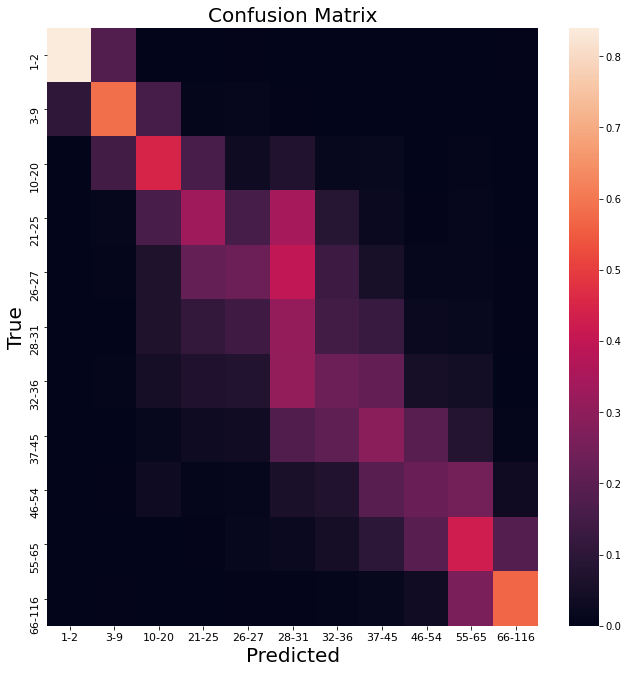

In [19]:
fig,ax= plt.subplots(figsize=(11,11))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1) + 1e-9), annot=False, ax=ax)
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(['1-2','3-9','10-20','21-25', '26-27', '28-31','32-36', '37-45', '46-54', '55-65', '66-116'], size=11); \
ax.yaxis.set_ticklabels(['1-2','3-9','10-20','21-25', '26-27', '28-31','32-36', '37-45', '46-54', '55-65', '66-116'], size=11);